In [6]:
from astropy.table import Table, vstack, Column, unique
from scipy.stats import gaussian_kde
import numpy as np
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
import random

In [ ]:
# Leer la tabla
table = Table.read('best.observations.idz', format='ascii')

# Convertir las columnas a cadenas y combinar
table['ra'] = [f"{ra_h}:{ra_m}:{ra_s}" for ra_h, ra_m, ra_s in zip(table['col5'], table['col6'], table['col7'])]
table['dec'] = [f"{dec_h}:{dec_m}:{dec_s}" for dec_h, dec_m, dec_s in zip(table['col8'], table['col9'], table['col10'])]
table['ra2000'] = [f"{ra_h2}:{ra_m2}:{ra_s2}" for ra_h2, ra_m2, ra_s2 in zip(table['col11'], table['col12'], table['col13'])]
table['dec2000'] = [f"{dec_h2}:{dec_m2}:{dec_s2}" for dec_h2, dec_m2, dec_s2 in zip(table['col14'], table['col15'], table['col16'])]

# Opcional: Eliminar las columnas originales si ya no son necesarias
table.remove_columns(['col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16'])

# Mostrar la tabla resultante
print(len(table.colnames))

# Opcional: Guardar la tabla resultante en un nuevo archivo
table.write('/home/seba/Downloads/best_observations_combined.idz', format='ascii')



In [ ]:
table_sdss = Table.read('/home/seba/Downloads/group_DR7/ipetroA_1', format='ascii')
#table_sdss = table_sdss[table_sdss['col3'] == 0]
# Obtener los ID de la columna 3

ids = table_sdss['col3']

# Filtrar los ID que son únicos
ids_unicos = [id for id in tqdm(ids, desc="Filtrando IDs únicos", unit="id") if list(ids).count(id) == 1]

# Filtrar la tabla para conservar solo las filas con ID únicos
tabla_filtrada = table_sdss[[id in ids_unicos for id in ids]]

tabla_filtrada.write('single_members_sdss.csv', format='csv', overwrite=True)

In [ ]:
galaxy_id = tabla_filtrada['col3'].tolist()

In [ ]:
galaxy_id = pd.read_csv('single_members_sdss.csv')
galaxy_id = galaxy_id['col3'].to_list()

In [ ]:
group_properties = Table.read('/home/seba/Downloads/group_DR7/petroA_group', format='ascii')
group_prop_isolated = group_properties[group_properties['col1'][galaxy_id]]

In [ ]:
group_prop_isolated.rename_column('col1', 'group_id')
group_prop_isolated.rename_column('col2', 'ra')
group_prop_isolated.rename_column('col3', 'dec')
group_prop_isolated.rename_column('col4', 'z')
group_prop_isolated.rename_column('col5', 'group_L')
group_prop_isolated.rename_column('col6', 'stellar_mass')
group_prop_isolated.rename_column('col7', 'halo_mass1')
group_prop_isolated.rename_column('col8', 'halo_mass2')
group_prop_isolated.rename_column('col9', 'mean_separation_L')
group_prop_isolated.rename_column('col10', 'mean_separation_M')
group_prop_isolated.rename_column('col11', 'f_edge')
group_prop_isolated.rename_column('col12', 'ID1')
group_prop_isolated.rename_column('col13', 'ID2')

In [ ]:
group_prop_isolated.write('sample_isolated.csv', format='csv', overwrite=True)

In [ ]:
group_prop_isolated = group_prop_isolated[group_prop_isolated['z'] <= 0.17]
group_prop_isolated = group_prop_isolated[(group_prop_isolated['stellar_mass'] < 12) & (group_prop_isolated['stellar_mass'] > 0)]
group_prop_isolated = group_prop_isolated[group_prop_isolated['dec'] <= 32.5]
#group_prop_isolated.write('sample_isolated_south.csv', format='csv')
len(group_prop_isolated)

In [ ]:
#group_prop_isolated_2 = Table.read('sample_before_mc_gswl.csv', format='ascii')
group_prop_isolated
plt.hist(group_prop_isolated['stellar_mass'], bins=30)
plt.show()

In [ ]:
# Número total de galaxias en la tabla
n_galaxies = len(group_prop_isolated_2)

# Generar 2000 índices aleatorios sin reemplazo
random_indices = np.random.choice(n_galaxies, size=2000, replace=False)

# Seleccionar 2000 galaxias aleatoriamente
sampled_galaxies = group_prop_isolated_2[random_indices]

# Mostrar las primeras filas de la tabla muestreada
sampled_galaxies

In [ ]:
sampled_galaxies.write('field_galaxies_gswl.csv', format='csv', overwrite=True)

In [ ]:
tab = Table.read('field_galaxies_gswl.csv', format='ascii')
tab = tab[tab['col10']>0]
plt.hist(tab['col10'], bins=30)
plt.show()

In [ ]:
galaxies = table_sdss[table_sdss['col3'][sampled_galaxies['group_id']]]
galaxies

In [ ]:
control_sample = Table.read('control_sample_for_bricks.csv', format='ascii')
radii_column = Column([1] * len(control_sample), name='Radii')

# Añadir la columna a la tabla
control_sample.add_column(radii_column)

# Crear una columna de índices
indices = list(range(1, len(control_sample) + 1))

# Añadir la columna de índices a la tabla
control_sample.add_column(Column(indices, name='index'))
#control_sample
#control_sample.write('control_sample_decals.csv', format='csv')
control_sample_1700 = control_sample[:1700]
control_sample_1700
# Guardar la tabla en un archivo CSV o el formato que prefieras
#control_sample_1700.write('/home/seba/Documents/DECALS/control_sample_1700.csv', format='csv', overwrite=True)

In [ ]:
control_sample_1446 = Table.read('/home/seba/Documents/DECALS/control_sample_1446.csv')
control_sample_1446 = control_sample_1446['ra', 'dec', 'index']
radii_column = Column([5] * len(control_sample_1446), name='Radii')

control_sample_1446.add_column(radii_column)
#control_sample_1446.write('/home/seba/Documents/DECALS/control_sample_1446.csv', format='csv', overwrite=True)
control_sample_1446
n_arcmin_5 = pd.read_csv('/home/seba/Documents/numeros_unicos.txt', header=None)
n = n_arcmin_5[0].to_list()
control_sample_242 = control_sample_1446[np.isin(control_sample_1446['index'], n)]
control_sample_242.write('/home/seba/Documents/DECALS/control_sample_242.csv', format='csv')

In [ ]:
tabla = Table.read('/home/seba/Documents/DECALS/control_sample_1446.csv', format='ascii')
tabla = tabla[644:]
#tabla
tabla.write('/home/seba/Documents/DECALS/control_sample_1446_751_1700.csv', format='csv')

In [ ]:
control_sample_1700 = Table.read('/home/seba/Documents/MorphoLS/Catalog/Galaxies_DECALS_control_sample.csv')
control_242 = pd.read_csv('/home/seba/Documents/numeros_unicos.txt', header=None)
n = control_242[0].to_list()
control_sample_242 = control_sample_1700[np.isin(control_sample_1700['index'], n)]
control_sample_741_1700 = control_sample_1700[control_sample_1700['index'] > 740]

tabla_combinada = vstack([control_sample_242, control_sample_741_1700])

# Eliminar las filas duplicadas basándote en la columna 'index'
tabla_final = unique(tabla_combinada, keys='index', keep='first')
tabla_final.write('/home/seba/Documents/MorphoLS/Catalog/Galaxies_DECALS_control_sample_2.csv', format='csv', overwrite=True)

In [ ]:
group_prop_isolated_dr4 = Table.read('field_sdss_dr4.csv', format='ascii')
group_prop_isolated_dr4.rename_column('col1', 'galaxy_id')
group_prop_isolated_dr4.rename_column('col2', 'NYU_id')
group_prop_isolated_dr4.rename_column('col3', 'z_source_id')
group_prop_isolated_dr4.rename_column('col4', 'ra')
group_prop_isolated_dr4.rename_column('col5', 'dec')
group_prop_isolated_dr4.rename_column('col6', 'z')
group_prop_isolated_dr4.rename_column('col7', 'r')
group_prop_isolated_dr4.rename_column('col8', 'r_limit')
group_prop_isolated_dr4.rename_column('col9', 'completeness')
group_prop_isolated_dr4.rename_column('col10', 'M_r')
group_prop_isolated_dr4.rename_column('col11', 'stellar_mass')
group_prop_isolated_dr4.rename_column('col12', 'g-r')

In [ ]:
group_prop_isolated_dr4 = group_prop_isolated_dr4[group_prop_isolated_dr4['z'] <= 0.17]
group_prop_isolated_dr4 = group_prop_isolated_dr4[(group_prop_isolated_dr4['stellar_mass'] < 12) & (group_prop_isolated_dr4['stellar_mass'] > 8)]
group_prop_isolated_dr4 = group_prop_isolated_dr4[group_prop_isolated_dr4['dec'] <= 32.5]

In [ ]:
group_prop_isolated_dr4.write('isolated_sample_dr4.csv', format='csv')

In [ ]:
# Número total de galaxias en la tabla
n_galaxies = len(group_prop_isolated_dr4)

# Generar 2000 índices aleatorios sin reemplazo
random_indices = np.random.choice(n_galaxies, size=2000, replace=False)

# Seleccionar 2000 galaxias aleatoriamente
sampled_galaxies_dr4 = group_prop_isolated_dr4[random_indices]

# Mostrar las primeras filas de la tabla muestreada
sampled_galaxies_dr4

In [ ]:
sampled_galaxies_low = sampled_galaxies_dr4[sampled_galaxies_dr4['stellar_mass'] < 9.5]
len(sampled_galaxies_low)

In [ ]:
plt.hist(sampled_galaxies_low['stellar_mass'], bins=30)

In [ ]:
#sampled_galaxies_low.write('low_mass_field.csv', format='csv', overwrite=True)
control_sample_low = sampled_galaxies_low['ra', 'dec']
radii_column = Column([5] * len(control_sample_low), name='Radii')

# Añadir la columna a la tabla
control_sample_low.add_column(radii_column)

# Crear una columna de índices
indices = list(range(1701, len(control_sample_low) + 1701))

# Añadir la columna de índices a la tabla
control_sample_low.add_column(Column(indices, name='index'))
control_sample_low.write('control_sample_low.csv', format='csv')

In [ ]:
control_sample = Table.read('/home/seba/Documents/MorphoLS/Output_Catalogs/GalfitM_Output_Control_Sample.csv')
control_sample_low = Table.read('/home/seba/Documents/MorphoLS/GalfitM_Output_Control_Sample_low.csv')
#tabla_combinada = vstack([control_sample, control_sample_low])
#tabla_combinada
#print(control_sample_low['XC_g'])
for col in control_sample_low.colnames:
    try:
        # Convertir solo los valores de tipo string
        control_sample_low[col] = [float(value.replace('*', '').strip()) if isinstance(value, str) else float(value)
                                   for value in control_sample_low[col]]
    except ValueError:
        # Si hay un error (como una columna no numérica), la ignoramos
        print(f"No se pudo convertir la columna {col} a float. Contiene datos no numéricos.")
for col in control_sample.colnames:
    try:
        # Convertir solo los valores de tipo string
        control_sample[col] = [float(value.replace('*', '').strip()) if isinstance(value, str) else float(value)
                                   for value in control_sample[col]]
    except ValueError:
        # Si hay un error (como una columna no numérica), la ignoramos
        print(f"No se pudo convertir la columna {col} a float. Contiene datos no numéricos.")

In [ ]:
tabla_combinada = vstack([control_sample, control_sample_low])
tabla_combinada.write('/home/seba/Documents/MorphoLS/Analysis/GalfitM_output_control_sample_full.csv')

## Para generar una muestra aleatoria en función de la KDE de la muestra de galaxias de los grupos compactos

/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


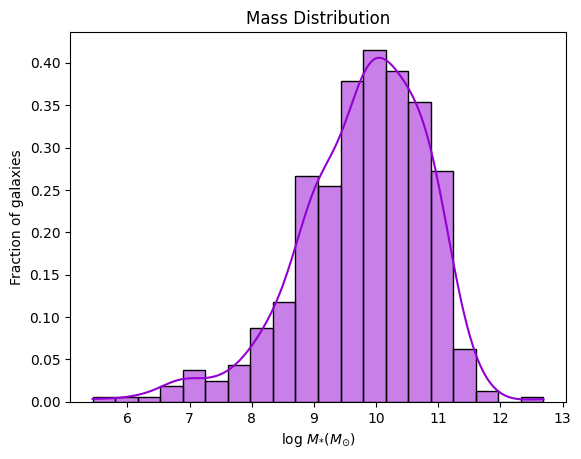

In [4]:
grupos = Table.read('/home/seba/Documents/MorphoLS/Analysis/sfr_decals.csv', format='ascii')
control = Table.read('isolated_sample_dr4.csv', format='ascii')
control_df = control.to_pandas()
masas_grupos = grupos['log(M_stellar)']
sns.histplot(masas_grupos, kde=True, stat='density', bins=20, color='darkviolet')
plt.xlabel('log $M_{*}(M_{\odot})$')
plt.ylabel('Fraction of galaxies')
plt.title('Mass Distribution')
plt.show()

In [5]:
kde = gaussian_kde(masas_grupos)
mass_range = np.linspace(min(masas_grupos), max(masas_grupos), 100)
kde_values = kde(mass_range)

/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


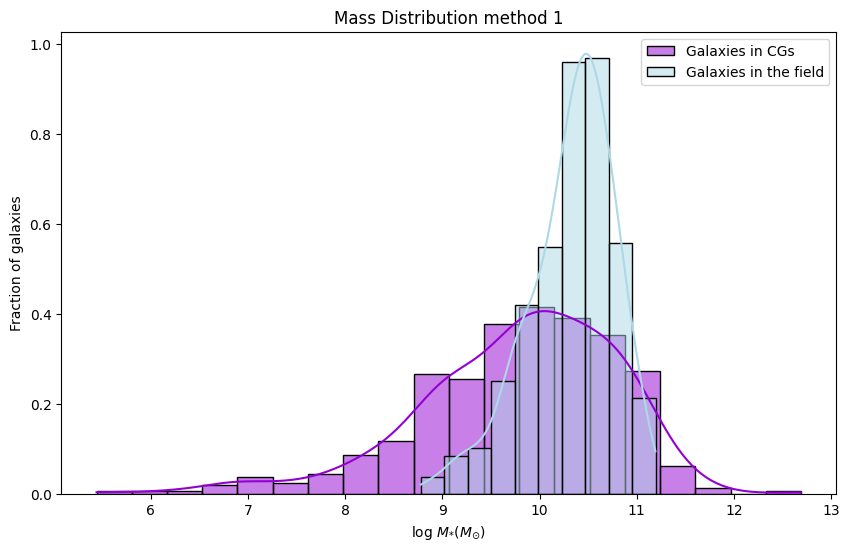

In [6]:
masas_campo = control_df['stellar_mass']

probabilities = kde(masas_campo)

probabilities /= probabilities.sum()
len(masas_campo)
selected_galaxies = control_df.sample(n=len(masas_grupos), weights=probabilities)
plt.figure(figsize = (10, 6))
sns.histplot(masas_grupos, kde=True, stat='density', bins=20, color='darkviolet', label='Galaxies in CGs')
sns.histplot(selected_galaxies['stellar_mass'], kde=True, stat='density', bins=10, color='lightblue', label = 'Galaxies in the field')
#sns.histplot(masas_grupos, kde=True, stat='density', bins=20, color='darkviolet')
plt.xlabel('log $M_{*}(M_{\odot})$')
plt.ylabel('Fraction of galaxies')
plt.title('Mass Distribution method 1')
plt.legend()
plt.show()


In [7]:
print(np.median(masas_grupos), np.median(selected_galaxies['stellar_mass']))

9.93415904725963 10.3952732


In [8]:
# Realizar el KS test
ks_stat, p_value = ks_2samp(masas_grupos, selected_galaxies['stellar_mass'])
print(ks_stat, p_value)

0.3348314606741573 1.7208593306883114e-22


/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


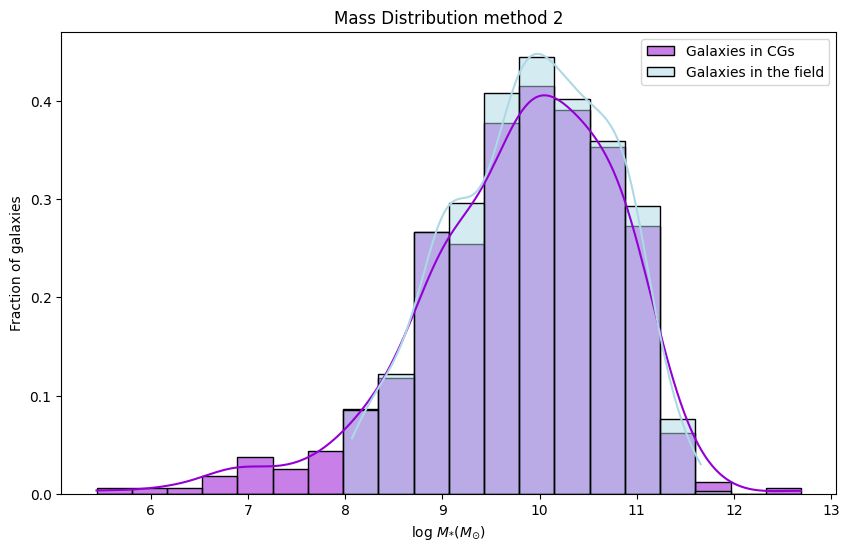

In [9]:
control_coin = Table.read('/home/seba/Documents/MorphoLS/Analysis/tabla_coincidencias.csv', format='ascii')
masas_coin = control_coin['stellar_mass']

# Definir los límites comunes para los bins
bin_edges = np.linspace(min(masas_grupos.min(), masas_coin.min()), 
                        max(masas_grupos.max(), masas_coin.max()), 
                        21)  # 20 bins

# Crear los histogramas con los mismos bordes de bins
plt.figure(figsize=(10, 6))
sns.histplot(masas_grupos, kde=True, stat='density', alpha=0.5, bins=bin_edges, color='darkviolet', label='Galaxies in CGs')
sns.histplot(masas_coin, kde=True, stat='density', alpha=0.5, bins=bin_edges, color='lightblue', label='Galaxies in the field')

# Etiquetas y título
plt.xlabel('log $M_{*}(M_{\odot})$')
plt.ylabel('Fraction of galaxies')
plt.title('Mass Distribution method 2')
plt.legend()

plt.show()

In [8]:
a = Table.read('tabla_coincidencias_fraccion.csv', format='ascii')
a

galaxy_id,NYU_id,z_source_id,ra,dec,z,r,r_limit,completeness,M_r,stellar_mass,g-r
int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
166698,443546,-1,351.703573778,15.646856367,0.013955,17.5699005,17.7681007,0.8732,-15.4696465,8.2720413,0.5743599
68061,207320,-1,171.987289342,1.299480568,0.015655,17.5600014,17.7812004,0.8302,-15.7641029,8.2972612,0.4366732
23982,91059,-1,201.879549488,0.739126064,0.013807,16.9250011,17.7000008,0.8957,-16.1052837,8.3134346,0.3364973
96689,271787,-1,15.663385389,-9.143663001,0.01516,17.5767002,17.7943001,0.8333,-15.7172174,8.1239853,0.2953682
63640,197874,-1,205.951233885,1.372377402,0.012795,16.8836002,17.7989998,0.8282,-15.9424715,8.2138224,0.228673
230168,642980,-1,139.586699558,6.510212867,0.020334,17.6709003,17.7805996,0.8342,-16.230217,8.2832479,0.2132397
83856,242051,-1,48.396147737,-8.0023411,0.016932,17.6609001,17.6917992,0.8389,-15.8190069,8.3407402,0.4619131
221479,622378,-1,146.037899914,5.936883936,0.010096,17.3005009,17.7768993,0.7884,-15.0292883,8.0802994,0.5593395
158466,418351,-1,204.012267575,-1.608630995,0.014619,17.6678009,17.7667999,0.957,-15.5226536,8.1674128,0.4532394


In [10]:
# Lee tus dos tablas
#tabla1 = Table.read('sfr_decals.csv', format='ascii')
#tabla2 = Table.read('/home/seba/Documents/CG/isolated_sample_dr4.csv', format='ascii')

# Columna con las masas estelares
#masa1 = tabla1['log(M_stellar)']
#masa2 = tabla2['stellar_mass']

# Definir el número de bins y el margen de error
num_bins = 20
margen_error = 0.02
total_galaxias = 2000

# Crear los bins de masa utilizando la distribución de masa de la primera tabla
bin_edges = np.linspace(masas_grupos.min(), masas_grupos.max(), num_bins + 1)
bins_1 = np.digitize(masas_grupos, bin_edges)  # Clasificar masas del catálogo 1 en bins
bins_2 = np.digitize(masas_campo, bin_edges)  # Clasificar masas del catálogo 2 en los mismos bins

# Crear una lista para almacenar las galaxias seleccionadas del segundo catálogo
coincidencias = []

# Iterar sobre cada bin de masa
for i in range(1, num_bins + 1):
    # Filtrar las galaxias del catálogo 1 en el bin actual
    galaxias_bin_1 = grupos[bins_1 == i]
    
    # Filtrar las galaxias del catálogo 2 en el mismo bin de masa
    galaxias_bin_2 = control[bins_2 == i]
    
    if len(galaxias_bin_2) > 0:
        # Calcular la fracción de galaxias en el bin en el catálogo 1
        fraccion = len(galaxias_bin_1) / len(masas_grupos)
        
        # Calcular cuántas galaxias seleccionar del catálogo 2 basado en esa fracción
        num_seleccionadas = int(fraccion * total_galaxias)
        
        # Seleccionar aleatoriamente esas galaxias del catálogo 2
        galaxias_seleccionadas = random.sample(list(galaxias_bin_2), min(num_seleccionadas, len(galaxias_bin_2)))
        
        # Agregar las galaxias seleccionadas a la lista
        coincidencias.extend(galaxias_seleccionadas)
        
# Ajustar el tamaño de la muestra final para que sea exactamente de 2000 galaxias
if len(coincidencias) > total_galaxias:
    coincidencias = random.sample(coincidencias, total_galaxias)

# Combinar las filas con coincidencias en una nueva tabla
if coincidencias:
    tabla_coincidencias = vstack(coincidencias)
    
    # Guardar la tabla resultante
    tabla_coincidencias.write('tabla_coincidencias_fraccion.csv', overwrite=True)
    print("Se ha generado la tabla con la misma fracción de galaxias por masa.")
else:
    print("No se encontraron coincidencias dentro del margen de error.")


Se ha generado la tabla con la misma fracción de galaxias por masa.


/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


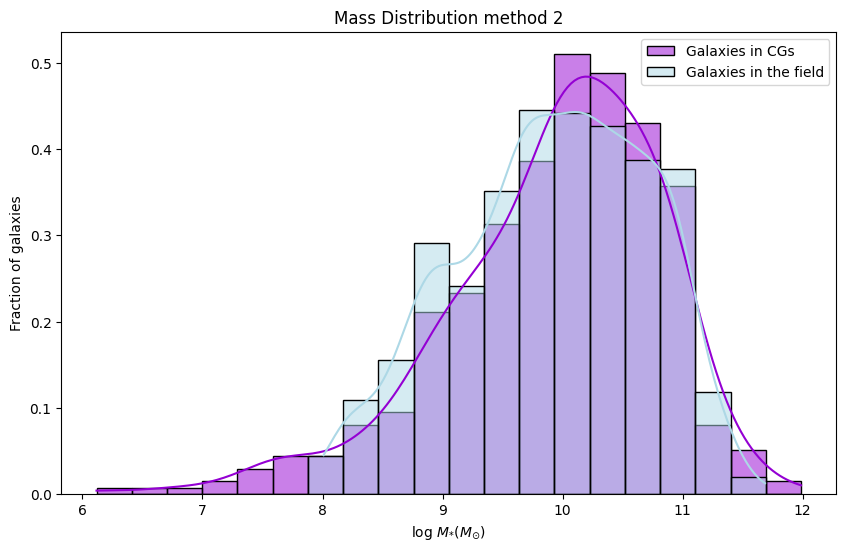

0.07166506996293068 0.040435460304349184


In [5]:
tabla_coincidencias = Table.read('tabla_coincidencias_fraccion.csv', format='ascii')
tabla_grupos = Table.read('/home/seba/Documents/MorphoLS/Analysis/sfr_decals_3.csv')
masas_coin_2 = tabla_coincidencias['stellar_mass']
masas_grupos = tabla_grupos['stellar_mass']
# Definir los límites comunes para los bins
bin_edges = np.linspace(min(masas_grupos.min(), masas_coin_2.min()), 
                        max(masas_grupos.max(), masas_coin_2.max()), 
                        21)  # 20 bins

# Crear los histogramas con los mismos bordes de bins
plt.figure(figsize=(10, 6))
sns.histplot(masas_grupos, kde=True, stat='density', alpha=0.5, bins=bin_edges, color='darkviolet', label='Galaxies in CGs')
sns.histplot(masas_coin_2, kde=True, stat='density', alpha=0.5, bins=bin_edges, color='lightblue', label='Galaxies in the field')

# Etiquetas y título
plt.xlabel('log $M_{*}(M_{\odot})$')
plt.ylabel('Fraction of galaxies')
plt.title('Mass Distribution method 2')
plt.legend()

plt.show()
# Realizar el KS test
ks_stat, p_value = ks_2samp(masas_coin_2, masas_grupos)
print(ks_stat, p_value)

In [14]:
# Lee tus tablas
tabla_grupos = Table.read('/home/seba/Documents/MorphoLS/Analysis/sfr_decals_3.csv', format='ascii')  # Galaxias de grupos
tabla_nueva = Table.read('isolated_sample_dr4.csv', format='ascii')  # Galaxias de campo
tabla_anterior = Table.read('tabla_coincidencias_fraccion.csv', format='ascii')  # Resultado anterior

# Definir el número de bins y el total de galaxias
num_bins = 20
total_galaxias = 2000

# Asumimos que en las nuevas tablas las masas estelares ya están calculadas
masa_grupos = tabla_grupos['stellar_mass']  # Masa de las galaxias de grupos
masa_campo = tabla_nueva['stellar_mass']  # Nueva masa estelar de las galaxias de campo

# Crear los bins de masa utilizando la distribución de masa de los grupos
bin_edges = np.linspace(masa_grupos.min(), masa_grupos.max(), num_bins + 1)
bins_grupos = np.digitize(masa_grupos, bin_edges)  # Clasificar masas de los grupos en bins
bins_campo = np.digitize(masa_campo, bin_edges)  # Clasificar nuevas masas en los mismos bins

# Las masas del conjunto anterior
masa_anterior = tabla_anterior['stellar_mass']
bins_anterior = np.digitize(masa_anterior, bin_edges)  # Clasificar las galaxias anteriores en bins

# Listas para almacenar las galaxias seleccionadas (anteriores y nuevas)
galaxias_anteriores_seleccionadas = []
galaxias_nuevas_seleccionadas = []

# Iterar sobre cada bin de masa
for i in range(1, num_bins + 1):
    # Filtrar las galaxias del catálogo de grupos en el bin actual
    galaxias_grupo_bin = tabla_grupos[bins_grupos == i]
    
    # Filtrar las galaxias del catálogo anterior y nuevo en el mismo bin
    galaxias_campo_bin = tabla_nueva[bins_campo == i]
    galaxias_anteriores_bin = tabla_anterior[bins_anterior == i]
    
    # Calcular la fracción de galaxias en el bin en el catálogo de grupos
    fraccion = len(galaxias_grupo_bin) / len(masa_grupos)
    
    # Calcular cuántas galaxias deben seleccionarse en este bin
    num_seleccionadas = int(fraccion * total_galaxias)
    
    # Mantener galaxias del resultado anterior en la mayor cantidad posible
    num_galaxias_anteriores = len(galaxias_anteriores_bin)
    galaxias_anteriores_seleccionadas.extend(list(galaxias_anteriores_bin))
    
    # Ver si necesitamos más galaxias del catálogo nuevo
    if num_galaxias_anteriores < num_seleccionadas:
        num_faltantes = num_seleccionadas - num_galaxias_anteriores
        
        # Seleccionar aleatoriamente más galaxias del nuevo catálogo si hacen falta
        nuevas_seleccionadas = random.sample(list(galaxias_campo_bin), min(num_faltantes, len(galaxias_campo_bin)))
        galaxias_nuevas_seleccionadas.extend(nuevas_seleccionadas)

# Ajustar el tamaño de la muestra final para que sea exactamente de 2000 galaxias
galaxias_seleccionadas = galaxias_anteriores_seleccionadas + galaxias_nuevas_seleccionadas
if len(galaxias_seleccionadas) > total_galaxias:
    galaxias_seleccionadas = random.sample(galaxias_seleccionadas, total_galaxias)

# Combinar las galaxias seleccionadas en una nueva tabla
if galaxias_seleccionadas:
    # Primero las galaxias anteriores, luego las nuevas
    tabla_coincidencias = vstack(galaxias_anteriores_seleccionadas + galaxias_nuevas_seleccionadas)
    
    # Guardar la tabla resultante
    tabla_coincidencias.write('tabla_coincidencias_fraccion_nueva_ordenada.csv', overwrite=True)
    print("Se ha generado la tabla con la misma fracción de galaxias por masa, ordenada por origen.")
else:
    print("No se encontraron coincidencias suficientes.")
tabla_coincidencias

Se ha generado la tabla con la misma fracción de galaxias por masa, ordenada por origen.


galaxy_id,NYU_id,z_source_id,ra,dec,z,r,r_limit,completeness,M_r,stellar_mass,g-r
int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
96689,271787,-1,15.663385389,-9.143663001,0.01516,17.5767002,17.7943001,0.8333,-15.7172174,8.1239853,0.2953682
221479,622378,-1,146.037899914,5.936883936,0.010096,17.3005009,17.7768993,0.7884,-15.0292883,8.0802994,0.5593395
158466,418351,-1,204.012267575,-1.608630995,0.014619,17.6678009,17.7667999,0.957,-15.5226536,8.1674128,0.4532394
178836,501098,-1,16.060822419,-0.844528984,0.015401,17.4643002,17.6947994,0.9945,-15.857852,8.0776005,0.2099686
284636,788621,-1,125.743385329,24.864193396,0.018206,17.5584011,17.7936993,0.8647,-16.1538296,8.127017,0.0771446
138554,372291,-1,169.016313328,3.567496882,0.020862,17.8220005,17.7859993,0.9455,-16.1400967,8.0924873,0.1092625
67758,206664,-1,204.777262829,3.419248139,0.011407,17.3722,17.8071003,0.8115,-15.247633,8.0826998,0.4819908
172986,466004,-1,13.922138555,-0.941892873,0.015024,17.8621998,17.6984997,1.0,-15.4356136,8.0798273,0.3727112
172849,465746,-1,10.455617833,-1.028191132,0.019142,17.8915005,17.6982994,0.973,-15.9532776,8.024539,0.0471392


/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


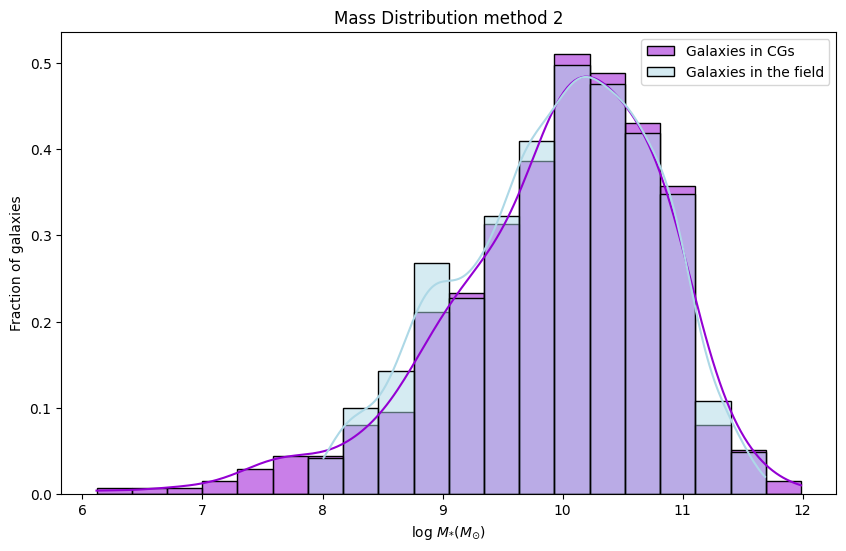

0.041850466566967955 0.5025732562014577


In [15]:
tabla_coincidencias = Table.read('tabla_coincidencias_fraccion_nueva_ordenada.csv', format='ascii')
tabla_grupos = Table.read('/home/seba/Documents/MorphoLS/Analysis/sfr_decals_3.csv')
masas_coin_2 = tabla_coincidencias['stellar_mass']
masas_grupos = tabla_grupos['stellar_mass']
# Definir los límites comunes para los bins
bin_edges = np.linspace(min(masas_grupos.min(), masas_coin_2.min()), 
                        max(masas_grupos.max(), masas_coin_2.max()), 
                        21)  # 20 bins

# Crear los histogramas con los mismos bordes de bins
plt.figure(figsize=(10, 6))
sns.histplot(masas_grupos, kde=True, stat='density', alpha=0.5, bins=bin_edges, color='darkviolet', label='Galaxies in CGs')
sns.histplot(masas_coin_2, kde=True, stat='density', alpha=0.5, bins=bin_edges, color='lightblue', label='Galaxies in the field')

# Etiquetas y título
plt.xlabel('log $M_{*}(M_{\odot})$')
plt.ylabel('Fraction of galaxies')
plt.title('Mass Distribution method 2')
plt.legend()

plt.show()
# Realizar el KS test
ks_stat, p_value = ks_2samp(masas_coin_2, masas_grupos)
print(ks_stat, p_value)

In [18]:
tabla_coincidencias_nueva = Table.read('tabla_coincidencias_fraccion_nueva_ordenada.csv')
radii_column = Column([5] * len(tabla_coincidencias_nueva), name='Radii')

# Añadir la columna a la tabla
#tabla_coincidencias.add_column(radii_column)

# Crear una columna de índices
indices = list(range(1, len(tabla_coincidencias) + 1))

# Añadir la columna de índices a la tabla
#tabla_coincidencias.add_column(Column(indices, name='index'))
#control_sample
#control_sample.write('control_sample_decals.csv', format='csv')
tabla_coincidencias_decals = tabla_coincidencias['index', 'ra', 'dec', 'Radii']
tabla_coincidencias_decals
# Guardar la tabla en un archivo CSV o el formato que prefieras
tabla_coincidencias_decals.write('/home/seba/Documents/DECALS/control_sample_2049.csv', format='csv', overwrite=True)

In [11]:
gal_5_arcmin = pd.read_csv('/home/seba/Documents/numeros_unicos.txt', header=None)
n = gal_5_arcmin[0].to_list()
tabla_coin_251 = tabla_coincidencias_decals[np.isin(tabla_coincidencias_decals['index'], n)]
tabla_coin_251
#tabla_coin_251.write('/home/seba/Documents/DECALS/control_sample_good_5_arcmin.csv', format='csv', overwrite=True)

index,ra,dec,Radii
int64,float64,float64,int64
1,351.703573778,15.646856367,5
2,171.987289342,1.299480568,5
15,177.107314397,12.395233592,5
17,169.016313328,3.567496882,5
19,20.763583152,15.211634817,5
22,205.089093651,1.542344878,5
26,213.94839062,4.1600258,5
27,191.718886567,-1.961213532,5
28,185.797648898,-3.491078503,5


In [24]:
tabla_coincidencias_decals.write('/home/seba/Documents/DECALS/control_sample_good.csv', format='csv', overwrite=True)